In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [62]:
df = df.drop('Id', axis=1)

In [63]:
X = df[[col for col in df.columns if col != 'Species']]
y = df['Species']

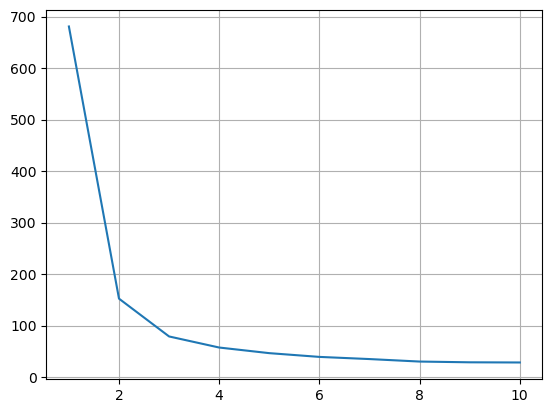

In [103]:
from sklearn.cluster import KMeans

arr = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    arr.append(kmeans.inertia_)

plt.plot(range(1, 11), arr)
plt.grid(True)
plt.show()

3 is the best number of clusters

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

y_pred = kmeans.predict(X_test)
adjusted_rand_score(y_test, y_pred)

0.7111695848908125

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
X_pca = pd.DataFrame(pca.fit_transform(X), columns= pca.get_feature_names_out())

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

In [69]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

y_pred = kmeans.predict(X_test)
adjusted_rand_score(y_test, y_pred)

0.8362815205118554